### 数据预处理
3.1 数据整合

3.1.1 加载相关库和数据集

使用的库主要有：pandas、numpy、matplotlib、seaborn


In [85]:
# 加载数据分析需要使用的库
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
 
plt.rcParams['font.sans-serif'] = ['SimHei']
warnings.filterwarnings('ignore')



使用的数据集：item-2018-06-01-2018-07-05

In [86]:

# 加载item数据集，使用'ISO-8859-1'编码方式
df = pd.read_csv('/Users/zhy/Desktop/item-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1') 
df.head()

,SDATE,STORE_CODE,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_TYPE,DISCOUNT_AMOUNT
0,2018/6/1,D007,3,250451,29405,1.000,1.70,2.0,m,-0.3
1,2018/6/1,D007,3,250451,13187,1.000,1.00,1.0,n,0.0
2,2018/6/1,D007,3,250243,196249,1.000,99.00,99.0,m,0.0
3,2018/6/1,D007,3,250243,199637,1.000,9.90,16.8,p,-6.9
4,2018/6/1,D007,1,160905,195012,3.222,18.69,5.8,n,0.0


使用的数据集：Basket-2018-06-01-2018-07-05

In [269]:
# 加载Basket数据集，使用'ISO-8859-1'编码方式
df2 = pd.read_csv('/Users/zhy/Desktop/Basket-2018-06-01-2018-07-05.csv',encoding='ISO-8859-1') 
df2.head()

,SHOP_DATETIME,STORE_CODE,POS_NO,BASK_CODE,BASK_SPEND
0,2018-06-01,D007,3,250458,8.0
1,2018-06-01,D007,3,250200,32.7
2,2018-06-01,D007,1,161068,16.8
3,2018-06-01,D007,8,5325,30.4
4,2018-06-01,D007,8,5361,191.3


3.1.2 数据概览

In [87]:
#首先看一下数据集大小（行列信息）
df.shape

(1048575, 10)

In [270]:
#首先看一下数据集大小（行列信息）
df2.shape

(571552, 5)

In [88]:
#看一下数据的分布概况
df.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


In [271]:
#看一下数据的分布概况
df2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


3.2 数据清洗

3.2.1 数据类型处理

In [89]:
#查看一下每一列的数据类型
df.dtypes
#可以看到：SDATE、STORE_CODE、DISCOUNT_TYPE 是object类型，其他列是数值型，这些列都不需要进行数据类型处理。日期应为datetime类型，我们需要对其进行处理。

SDATE               object
STORE_CODE          object
POSID                int64
BASK_CODE            int64
PROD_CODE            int64
ITEM_QUANTITY      float64
ITEM_SPEND         float64
NORMAL_PRICE       float64
DISCOUNT_TYPE       object
DISCOUNT_AMOUNT    float64
dtype: object

In [90]:
df["SDATE"] = pd.to_datetime(df["SDATE"]) 
df["SDATE"].sample(5)

511781   2018-06-14
337189   2018-06-05
656627   2018-06-12
828675   2018-06-17
820985   2018-06-16
Name: SDATE, dtype: datetime64[ns]

In [272]:
#查看一下每一列的数据类型
df2.dtypes
#可以看到：SHOP_DATETIME、STORE_CODE是object类型，其他列是数值型，这些列都不需要进行数据类型处理。日期应为datetime类型，我们需要对其进行处理。

SHOP_DATETIME     object
STORE_CODE        object
POS_NO             int64
BASK_CODE          int64
BASK_SPEND       float64
dtype: object

In [274]:
df2["SHOP_DATETIME"] = pd.to_datetime(df2["SHOP_DATETIME"]) 
df2["SHOP_DATETIME"].sample(5)

35232    2018-06-17
306142   2018-06-09
469573   2018-06-20
249235   2018-06-17
462103   2018-06-16
Name: SHOP_DATETIME, dtype: datetime64[ns]

3.2.3 缺失值处理

In [91]:
#查看一下各列的缺失值情况
df.isnull().sum(axis=0)#通过观察发现，没有缺失值

SDATE              0
STORE_CODE         0
POSID              0
BASK_CODE          0
PROD_CODE          0
ITEM_QUANTITY      0
ITEM_SPEND         0
NORMAL_PRICE       0
DISCOUNT_TYPE      0
DISCOUNT_AMOUNT    0
dtype: int64

In [275]:
#查看一下各列的缺失值情况
df2.isnull().sum(axis=0)#通过观察发现，没有缺失值

SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0
dtype: int64

3.2.4 异常值处理

查看数据是否存在异常值

In [80]:
df.describe()

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,3.016397e+00,1.611352e+05,1.147050e+05,1.490041e+00,1.363701e+01,1.483649e+01,-1.960952e+00
std,2.478932e+00,8.605571e+04,8.133691e+04,8.255032e+00,1.089738e+02,2.504771e+01,6.330616e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,-1.200000e+02,-8.700000e+02,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.477400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695360e+05,1.244580e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.177830e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,6.960000e+02


In [97]:
#从最小值中看出ITEM_QUANTITY列中有负数，说明有异常值，给予删除
df_new=df[df['ITEM_QUANTITY']>0]

In [99]:
df_new.describe()
#可以看出异常值被删除

,POSID,BASK_CODE,PROD_CODE,ITEM_QUANTITY,ITEM_SPEND,NORMAL_PRICE,DISCOUNT_AMOUNT
count,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06,1.047389e+06
mean,3.014803e+00,1.611660e+05,1.146857e+05,1.495503e+00,1.370416e+01,1.481427e+01,-1.971159e+00
std,2.473808e+00,8.604381e+04,8.133262e+04,8.253395e+00,1.089854e+02,2.498871e+01,6.333295e+01
min,1.000000e+00,9.610000e+02,1.900000e+01,1.000000e-02,0.000000e+00,5.000000e-01,-5.760000e+04
25%,1.000000e+00,8.481400e+04,2.183500e+04,1.000000e+00,3.900000e+00,3.800000e+00,-1.500000e+00
50%,2.000000e+00,1.695760e+05,1.244480e+05,1.000000e+00,7.500000e+00,7.900000e+00,0.000000e+00
75%,3.000000e+00,2.178000e+05,1.959900e+05,1.000000e+00,1.250000e+01,1.580000e+01,0.000000e+00
max,2.000000e+01,3.148270e+05,2.247450e+05,4.020000e+03,6.912000e+04,1.980000e+03,2.264000e+02


In [100]:
df_new.shape
#原数据为1048575条，现数据为1047389条，删除了

(1047389, 10)

In [276]:
df2.describe()

,POS_NO,BASK_CODE,BASK_SPEND
count,571552.000000,571552.000000,571552.000000
mean,2.998429,167472.817102,38.973310
std,2.516065,87263.199857,209.038276
min,1.000000,961.000000,-35940.000000
25%,1.000000,90533.750000,9.000000
50%,2.000000,177603.500000,19.900000
75%,3.000000,238816.750000,44.700000
max,20.000000,323914.000000,79920.000000


In [278]:
#从最小值中看出BASK_SPEND列中有负数，说明有异常值，给予删除
df_new2=df2[df2['BASK_SPEND']>0]

In [279]:
df_new2.describe()
#可以看出异常值被删除

,POS_NO,BASK_CODE,BASK_SPEND
count,569797.000000,569797.000000,569797.000000
mean,2.994330,167572.136898,39.583197
std,2.502507,87224.915886,196.158166
min,1.000000,961.000000,0.010000
25%,1.000000,90673.000000,9.000000
50%,2.000000,177692.000000,20.000000
75%,3.000000,238933.000000,44.800000
max,20.000000,323914.000000,79920.000000


In [280]:
df_new2.shape
#原数据为571552条，现数据为569797条，删除了

(569797, 5)

### 数据分析
4.1 总体情况分析


In [283]:
days_num2 = len(df_new2['SHOP_DATETIME'].unique())
stores_num2 = len(df_new2['STORE_CODE'].unique())
basks_num2 = len(df_new2['BASK_CODE'].unique())
prods_num2 = len(df_new2['POS_NO'].unique())

print('天数总数为: %d' %days_num2)
print('超市总数为: %d' %stores_num2)
print('购物篮总数为: %d' %basks_num2)
print('POS机总数为: %d' %prods_num2)


天数总数为: 35
超市总数为: 24
购物篮总数为: 280816
POS机总数为: 13


In [282]:
days_num = len(df_new['SDATE'].unique())
stores_num = len(df_new['STORE_CODE'].unique())
poss_num = len(df_new['POSID'].unique())
basks_num = len(df_new['BASK_CODE'].unique())
prods_num = len(df_new['PROD_CODE'].unique())
discs_num = len(df_new['DISCOUNT_TYPE'].unique())
print('天数总数为: %d' %days_num)
print('超市总数为: %d' %stores_num)
print('pos机总数为: %d' %poss_num)
print('购物篮总数为: %d' %basks_num)
print('商品总数为: %d' %prods_num)
print('折扣种类为: %d' %discs_num)

天数总数为: 23
超市总数为: 24
pos机总数为: 13
购物篮总数为: 222126
商品总数为: 17424
折扣种类为: 9


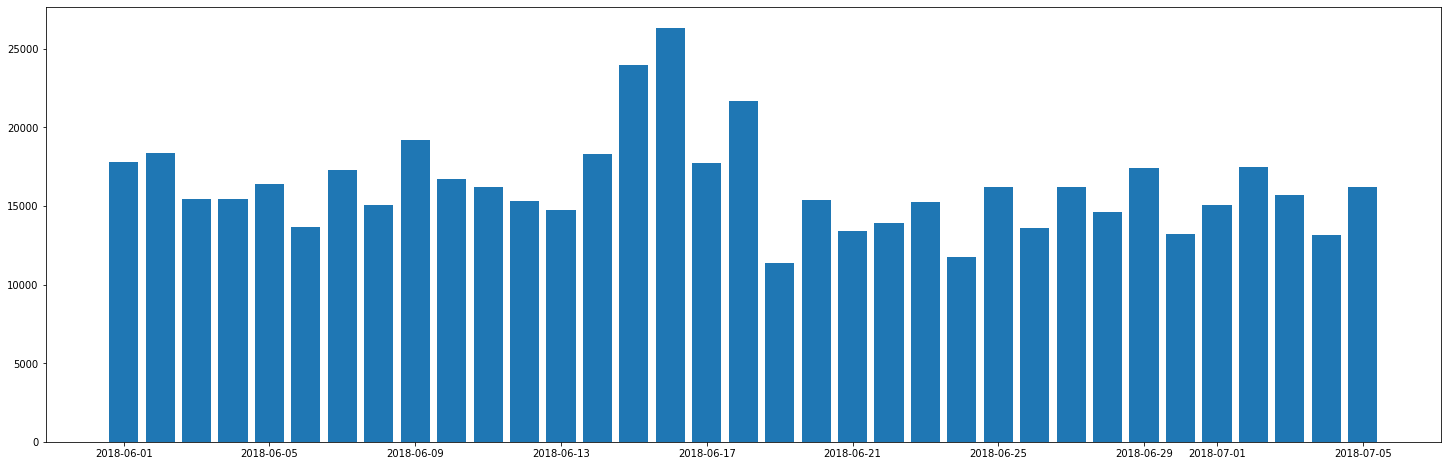

In [288]:
plt.figure(figsize=(25, 8))
day2 = df_new2["SHOP_DATETIME"].unique()
order_count2 = df_new2.groupby(by='SHOP_DATETIME').count()["BASK_SPEND"]
plt.bar(day2, order_count2)                 
plt.show()
#从上图可以看出，每天的花费数并不均衡。最高峰集中在中后旬，后旬消费者花费明显下降。针对这一现象可以着重考虑如何提高后旬的销量。

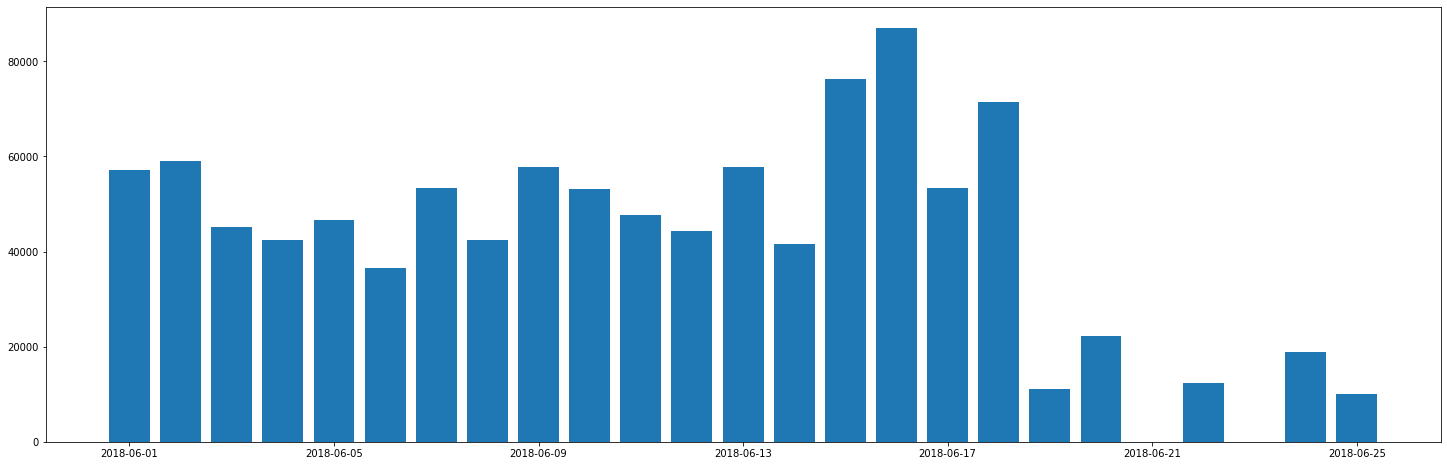

In [290]:
plt.figure(figsize=(25, 8))
day = df_new["SDATE"].unique()
order_count = df_new.groupby(by='SDATE').count()["ITEM_SPEND"]
plt.bar(day, order_count)                 
plt.show()
#从上图可以看出，每天的花费数并不均衡。最高峰集中在中后旬，后旬消费者花费明显下降。针对这一现象可以着重考虑如何提高后旬的销量。

4.2 各维度分析

分析数据可以从两方面开始考虑，一个是维度，一个是指标，维度可以看做x轴，指标可以看成是y轴，同一个维度可以分析多个指标，同一个维度也可以做降维升维

4.2.1超市分析

In [294]:
storeId_count2 = df_new2.groupby('STORE_CODE').count()['BASK_CODE'].sort_values(ascending=False)
print(storeId_count2.head(10))
#人流前10名的超市

STORE_CODE
A001    66507
D002    62949
D007    37503
A008    36462
A013    30064
A006    28470
A012    24946
A009    21809
D004    21362
D008    21029
Name: BASK_CODE, dtype: int64


In [295]:
print(storeId_count2.tail(10))
#人流后10名的超市

STORE_CODE
A007    17954
A019    16985
D009    15827
A018    15731
D005    15261
A022    15260
A004    13429
A017    12459
D010    11070
D003     7771
Name: BASK_CODE, dtype: int64


In [296]:
#再看一下销售额前十名的超市
storeId_amount2 = df_new2.groupby('STORE_CODE').sum()['BASK_SPEND'].sort_values(ascending=False)
print(storeId_amount2.head(10))
#销售额前10名的超市

STORE_CODE
A001    3.478348e+06
D002    3.177385e+06
D007    1.382203e+06
A008    1.324641e+06
A013    1.126551e+06
A006    9.439233e+05
A012    8.546610e+05
D004    8.153388e+05
D006    8.144365e+05
A009    8.052129e+05
Name: BASK_SPEND, dtype: float64


In [297]:
print(storeId_amount2.tail(10))
#销售额后10名的超市
#可以看出，前十名和后十的超市销售额相差很大

STORE_CODE
A010    653372.90
A019    650797.35
A018    563395.09
D005    561386.80
A004    515663.06
A022    488646.16
D009    473629.18
A017    401767.00
D010    364347.25
D003    253080.72
Name: BASK_SPEND, dtype: float64


In [298]:
problem_storeIds2 = storeId_amount2.head(10).index.intersection(storeId_count2.head(10).index)
print(len(problem_storeIds2))
print(problem_storeIds2.tolist())

9
['A001', 'D002', 'D007', 'A008', 'A013', 'A006', 'A012', 'D004', 'A009']


In [ ]:
SHOP_DATETIME    0
STORE_CODE       0
POS_NO           0
BASK_CODE        0
BASK_SPEND       0

In [197]:
storeId_count = df_new.groupby('STORE_CODE').count()['PROD_CODE'].sort_values(ascending=False)
print(storeId_count.head(10))
#销量前10名的超市

STORE_CODE
D002    142433
A001    122641
A008     69861
D007     69800
A013     50781
A006     49792
D004     44387
A012     41336
D006     39518
A021     36025
Name: PROD_CODE, dtype: int64


In [198]:
print(storeId_count.tail(10))
#销量后10名的超市
#可以看出，前两名和后边的超市销量相差很大

STORE_CODE
A010    31503
A019    30549
A004    29420
D005    29063
A018    26636
D009    25149
A022    24537
D010    20055
A017    17701
D003    12699
Name: PROD_CODE, dtype: int64


In [202]:
#再看一下销售额前十名的超市
storeId_amount = df_new.groupby('STORE_CODE').sum()['ITEM_SPEND'].sort_values(ascending=False)
print(storeId_amount.head(10))
#销售额前10名的超市

STORE_CODE
A001    2.413546e+06
D002    1.934742e+06
A008    9.145735e+05
D007    8.436205e+05
A013    7.538393e+05
A006    6.378124e+05
A012    5.712609e+05
A007    5.008311e+05
A009    4.959406e+05
D004    4.923083e+05
Name: ITEM_SPEND, dtype: float64


In [203]:
print(storeId_amount.tail(10))
#销售额后10名的超市

STORE_CODE
D008    416171.37
A019    410409.35
A004    344320.75
D005    329099.65
A018    325387.19
A022    282829.62
D009    274901.19
A017    254315.82
D010    219562.27
D003    148591.63
Name: ITEM_SPEND, dtype: float64


根据以上的结果，对销售额/销量排名前十名的超市可以采取增加库存，增加推广成本等措施来进一步提升销量。而对于销售额/销量排名后几名的超市，则需要进行调研分析，学习前两名超市的运营模式、策略，确定超市销售额低下的原因，采取一定措施进行超市销量的提升，也可以考虑适当减少这些商品的库存，以减少损失。

看下销量和销售额都排名前10的超市：

In [211]:
problem_storeIds = storeId_amount.head(10).index.intersection(storeId_count.head(10).index)
print(len(problem_storeIds))
print(problem_storeIds.tolist())

8
['A001', 'D002', 'A008', 'D007', 'A013', 'A006', 'A012', 'D004']


一共有8个超市销量和销售额表现优秀， 因此，我们可以针对这些超市开展更多的优惠活动或者线下活动，进一步提升销量。